Introduction in OCR:

*OCR* stands for *Optical Character Recognition*. This technology is based on python and it enables to conversion of different types of documents, for example scanned paper documents, PDF's, or images captured by a digital camera, into editable and searchable data. The goal of the technology of *OCR* is to recognize and extract text from two-dimensional image of text, that could contain machine printed or handwritten text from its image representation and convert it into machine-readable text, such as from the text in a piece of paper and convert it into a PDF file.

*OCR* systems make use of a combination of sophisticated algorithms, pattern recognition and machine learning techniques to recognize characters and words within a two-dimensinal text. These algorithm analyse the shapes and sizes to identify and interpret the text accurately. This technology can increase it accuracy and efficiency by imporve the neural networks, computer vision and deep learning on the machine.

In [ ]:
! pip install easyocr torch

First we need to install some libraries that we will be using. For that we need to use `pip`.

`pip` is the Python package installer. `pip` is used to download and install packages from the *Python Package Index (PyPI)* and other package repositories. It manages package installations, updates, and removals.

PyTorch (`torch`) is an open-source machine learning library used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It provides a flexible and powerful platform for building deep learning models.


In [ ]:
import os
from typing import List
import argparse
import easyocr

`import os` allows your script to interact with the operating system. It's used for tasks like navigating file directories or working with file paths.

`from typing import List` is used for type hints, which help specify the kind of elements a list should contain, improving code readability and error detection. For example, `list[str]` indicates a list of strings.

`import argparse` is used for creating user-friendly command-line interfaces. It helps your script understand command-line arguments and options, making it easier to configure and run your script from the terminal.

`import easyocr` is a python package that allows computer vision developers to effortlessly perform *Optical Character Recognition*. A varied dataset of text images is fundamental for getting started with *EasyOCR*. It helps the *OCR* system to handle a wide range of text styles, fonts, and orientations, enhancing the systems overall effectiveness.

In [ ]:
# Setup reader ocr

reader = easyocr.Reader(['en'])

The single line: `reader = easyocr.Reader(['en'])` initializes an *Optical Character Recognition (OCR)* reader using the EasyOCR library, specifically configured to recognize English text. Here's a breakdown of what each part of the line does:

`easyocr.Reader` is a constructor for creating a new *OCR* reader instance using the *EasyOCR* library. The Reader object is what you use to perform *OCR* operations on images.

The parameter passed to the Reader constructor is a list of language codes specifying which languages the *OCR* engine should recognize. In this case, `['en']` indicates that the reader should be able to recognize English text. *EasyOCR* supports multiple languages, and you can pass more than one language code in this list if you need to recognize text in multiple languages.

We assigned reader: This is the variable name assigned to the instance of the Reader object. Once initialized, you use this reader object to call *OCR* methods to analyze images and extract text from them.

Overall, this line sets up an *EasyOCR* reader instance that's ready to recognize English text in images. You can then use this reader to process images by passing them to the reader's methods, such as readtext, to extract text data.

In [ ]:
def ocr_scan(image_path: str) -> str:
    result = reader.readtext(image_path) #Use the reader to read text from the image
    recognized_text = " ".join([text for _, text, _ in result]) #Combine the detected text pieces into a single string

    return recognized_text

image_path = "/content/Test_image.png"
recognized_text = ocr_scan(image_path)
print(recognized_text)

It was the best of times, it was the worst of times, it was the age of wisdom; it was the age of foolishness .


This code defines a Python function named `ocr_scan` that performs *Optical Character Recognition (OCR)* on an image file to extract and return its textual content as a single string. Here's a step-by-step explanation:

**Function Definition:**

The function `ocr_scan` is defined with one parameter, `image_path`, which is a string representing the path to the image file you want to perform OCR on. The function is expected to return a string `str`, which is the recognized text from the image.

**Performing OCR:**

`result = reader.readtext(image_path)` uses an *OCR* reader to perform OCR on the image located at `image_path`. The readtext method of the reader object processes the image and returns a list of tuples. Each tuple contains the bounding box coordinates of a detected text region, the text string itself, and a confidence level for the OCR recognition.

**Extracting and Combining Recognized Text:**

`recognized_text = " ".join([text for _, text, _ in result])` extracts just the text strings from each tuple in the result list and combines them into a single string, `recognized_text`. The comprehension `[text for _, text, _ in result]` iterates over each tuple in result, ignoring the bounding box coordinates and confidence level (represented by underscores _ as placeholders), and collects the text strings. These strings are then joined together with spaces `(" ".join(...))` to form a single, coherent piece of text that represents all the recognized text from the image.

**Returning the Recognized Text:**

`return recognized_text` returns the combined recognized text as its output.

In [ ]:
def search_images(directory: str, keyword: str) -> list[str]:
    matching_images = []
    for root, dir, files in os.walk(directory):
        for file in files:
            if file.endswith((".png", ".jpg", ".jpeg")):
                image_path = os.path.join(root, file)
                detected_text = ocr_scan(image_path)
                if keyword.lower() in detected_text.lower():
                    matching_images.append(image_path)

    return matching_images

search_images(".", keyword = "wisdom")

['./Test_image.png']

This code defines a function named `search_images` that is designed to search for images containing a specified keyword using *OCR*. Here's a step by step explanation:

**Function Definition:**

The function is named `search_images`, and takes two parameters. The first is `directory`, which is a string representing the directory path where the images are stored. The second parameter is `keyword`, which is a string representing the keyword to search for in the text detected in the images. The return type is specified as a list of strings `list[str]`, representing the paths of the matching images.

**Initialization of an Empty List:**

The code `matching_images = []` initializes an empty list. This list will be used to store the paths of images that contain the specified keyword.

**Iterating Through Files in the Specified Directory:**

The `os.walk` function is used to iterate through all the files in the specified directory and its subdirectories. `root` represents the current directory being processed, `dir` represents the subdirectories in the current directory, and `files` represents the files in the current directory. All of these variables are used inside a for loop.

**Filtering Image Files:**

This part of the code uses a for loop to check, for each file in the current directory, if the file has one of the specified image extensions, for example, `(".png", ".jpg", ".jpeg")`. This is a basic filter to exclude all non-image files that cannot be detected by OCR.

**Extracting Image Paath and Performing OCR:**

In the code `image_path = os.path.join(root, file)`, the full path of the image file is created using os.path.join. The function `ocr_scan`, which had been defined before, is called with the image path, which presumably performs OCR on the image, extracting the text from it.

**Checking for Jeyword in Detected Text:**

This part discusses the code: `if keyword.lower() in detected_text.lower():`. Both the keyword and detected text are converted to lowercase using the function `.lower()`. As part of the code is an if statement, it checks if the lowercase keyword is present in the lowercase detected text. If the keyword is found in the detected text, the image path is considered a match.

**Appending Matching Image Paths to List:**

This part represents the code: `matching_images.append(image_path)`. Continuing from the previous part, if a match is found, the path of the current image is appended to the `matching_images` list.

**Returning Matching Image Paths:**

The return code looks like this: `return matching_images`. Therefore, after processing all files in the specified directory and its subdirectories, the function returns the list of image paths that contain the specified keyword.

**Example Usage:**

`search_images(".", keyword="wisdom")` calls the fuctionand looks in the current directory `(".")` and the keyword "wisdom" in this case. It returns a list of paths from the images where the detected keyword is found.

In [ ]:
def main():
    # Manual input prompts to replace argparse in environments like Jupyter notebooks
    use_directory = input("Do you want to search in a directory (yes/no)? ").lower() == 'yes'
    if use_directory:
        directory = input("Enter the directory path containing the images: ")
        keyword = input("Enter the keyword text you are looking for: ")
        matching_images = search_images(directory, keyword)
        print("Images that contain the keyword:")
        for image_path in matching_images:
            print(image_path)
    else:
        image_path = input("Enter the image path to scan: ")
        keyword = input("Enter the keyword text you are looking for: ")
        detected_text = ocr_scan(image_path)
        if keyword.lower() in detected_text.lower():
            print("Keyword detected in the image")
            print(f"Detected text: {detected_text}")
        else:
            print("Keyword not detected in the image")

if __name__ == "__main__":
    main()


Do you want to search in a directory (yes/no)? yes
Enter the directory path containing the images: /content
Enter the keyword text you are looking for: time
Images that contain the keyword:
/content/Test_image.png


This code defines a `main()` function for interacting with the *OCR* system. The purpose of the `main()` function is to provide a simple interface for users to search for images or analyse individual images based on the specific keyword they want to find.

**User Input for Search Mode:**

`use_directory = input("Do you want to search in a directory (yes/no)? ").lower() == 'yes'`. The code is to let the user to decide whether they want to search in a directory or analyse a single image. Also, the input is converted to lowercase, and the variable `use _directory` is set to `True` if the user inputs “yes” or else `False`.

**Conditional Branching Based on User Input:**

This part is the main if statement in the `main()` function. If `use_directory` is `True`, the code inside the first block is executed for searching in a directory. Otherwise, the code inside the second block is executed for analysing a single image.

**Directory Search:**

If the user input “yes” in the user input, it will starts searching in a directory, they are prompted to enter the directory path and the keyword. The function `search_images` is called with the specified directory and keyword and the paths of images containing the keyword will be printed.

**Single Image Analysis:**

If the user chooses to analyse a single image, they are prompted to enter the image path and the keyword. The function `ocr_scan` function is called to extract text from the image. The detected text is compared with the specified keyword, and a message is printed based on the code here:
```
if keyword.lower() in detected_text.lower():
print("Keyword detected in the image")
print(f"Detected text: {detected_text}")
else:
print("Keyword not detected in the image")
```

In [ ]:
def main():
    # Assuming the working directory is always the target directory in Google Colab
    directory = os.getcwd()  # Gets the current working directory
    keyword = input("Enter the keyword text you are looking for: ")

    # Assuming search_images function is implemented to search through all images in the given directory
    matching_images = search_images(directory, keyword)

    if matching_images:
        print("Images that contain the keyword:")
        for image_path in matching_images:
            print(image_path)
    else:
        print("No images containing the keyword were found.")

# Implement or ensure the search_images function and ocr_scan function are defined as per previous instructions

if __name__ == "__main__":
    main()


Enter the keyword text you are looking for: time
Images that contain the keyword:
/content/Test_image.png


This other main fuction basically has the same behaviour but instead of asking you for the directory it just searches the images in the default work directory. This is done by saying that the variable `directory` is equal to `os.getcwd()` which refers to the current directory of the program.

In [ ]:
! pip install nltk matplotlib beautifulsoup4 gensim svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
#tokenize the data into features (words); display them
from nltk.tokenize import word_tokenize
features = word_tokenize(recognized_text)
print(features)

['It', 'was', 'the', 'best', 'of', 'times', ',', 'it', 'was', 'the', 'worst', 'of', 'times', ',', 'it', 'was', 'the', 'age', 'of', 'wisdom', ';', 'it', 'was', 'the', 'age', 'of', 'foolishness', '.']


In [ ]:
# normalize the features to lower case and exclude punctuation
features = [feature for feature in features if feature.isalpha()]
features = [feature.lower() for feature in features]
print(features)

['it', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst', 'of', 'times', 'it', 'was', 'the', 'age', 'of', 'wisdom', 'it', 'was', 'the', 'age', 'of', 'foolishness']


In [ ]:
# create a list of (English) stopwords, and then remove them from the features
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
features = [feature for feature in features if feature not in stopwords]

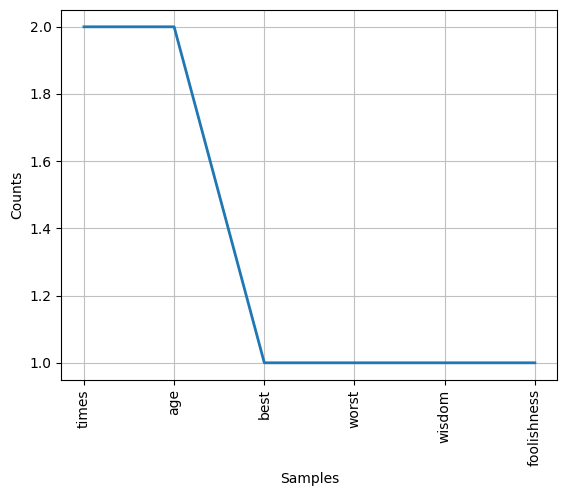

In [ ]:
# count & tabulate the features, and then plot the results -- season to taste
from nltk import FreqDist
frequencies = FreqDist(features)
plot = frequencies.plot(10)

In [ ]:
# create a list of unique words (hapaxes); display them
hapaxes = frequencies.hapaxes()
print(hapaxes)

['best', 'worst', 'wisdom', 'foolishness']


In [ ]:
# count & tabulate ngrams from the features -- season to taste; display some
from nltk import ngrams
ngrams = ngrams(features, 2)
frequencies = FreqDist(ngrams)
frequencies.most_common(10)

[(('best', 'times'), 1),
 (('times', 'worst'), 1),
 (('worst', 'times'), 1),
 (('times', 'age'), 1),
 (('age', 'wisdom'), 1),
 (('wisdom', 'age'), 1),
 (('age', 'foolishness'), 1)]

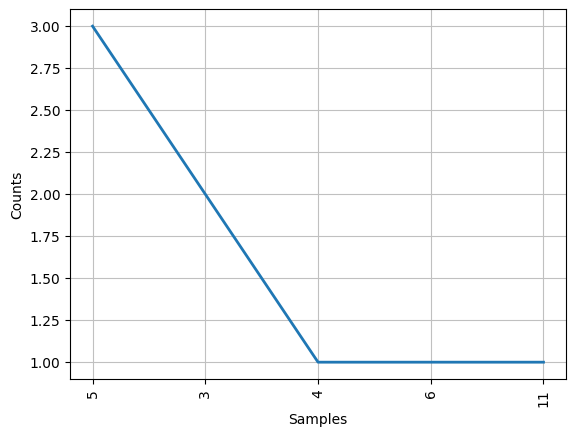

In [ ]:
# create a list each token's length, and plot the result; How many "long" words are there?
lengths = [len(feature) for feature in features]
plot = FreqDist(lengths).plot(10)

In [ ]:
# initialize a stemmer, stem the features, count & tabulate, and output
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stems = [stemmer.stem(feature) for feature in features]
frequencies = FreqDist(stems)
frequencies.most_common(10)

[('time', 2),
 ('age', 2),
 ('best', 1),
 ('worst', 1),
 ('wisdom', 1),
 ('foolish', 1)]

In [ ]:
# re-create the features and create a NLTK Text object, so other cool things can be done
from nltk import Text
features = word_tokenize(recognized_text)
text = Text(features)

This code snippet prepares the obtained text from the *OCR* for linguistic analysis using the *Natural Language Toolkit (NLTK)* in Python. Here's a step-by-step explanation:

**Tokenization:**

The `word_tokenize` function is employed to dissect the `recognized_text` into a sequence of tokens or words. This is a necessary preliminary step for textual analysis, enabling the detailed examination of the text's structure and content.

**Creating an NLTK Text Object:**

After tokenization, an *NLTK* `Text` object is created by passing the `features` list to the `Text` class constructor. The `Text` class is a part of the NLTK library designed to facilitate `text` analysis and exploration. By converting the list of tokens into a `Text` object, stored in the variable `text`, the snippet enables the use of various sophisticated linguistic analysis tools provided by NLTK. These tools include functionalities for concordance views, similar word searches, lexical dispersion plots, and much more, thereby allowing for "other cool things" to be done with the processed text.

This process is crucial for transforming recognized text into a form that is amenable to in-depth linguistic analysis, thereby opening up a plethora of possibilities for exploring and understanding the textual data.

In [ ]:
# count & tabulate, again; list a given word -- season to taste
frequencies = FreqDist(text)
print(frequencies['it'])

3


This code snippet continues the process of text analysis by counting and tabulating the frequency of words within a given text, and then specifically listing the frequency of a chosen word, in this case, "it". Here’s a detailed explanation:

**Counting and Tabulating Frequencies:**

The `FreqDist` function from the *Natural Language Toolkit (NLTK)* is utilized to create a frequency distribution of all words within the `text` object. The `text` object is expected to be an instance of *NLTK*'s `Text` class, which represents a sequence of tokens (words) extracted from a text source, potentially through processes like *Optical Character Recognition (OCR)* or manual `text` input. The FreqDist function computes how many times each word occurs within the `text` and stores this information in the variable `frequencies`, which essentially becomes a dictionary where keys are words and values are the counts of those words.

**Listing the Frequency of a Specific Word:**

The next line of the code, `print(frequencies['it'])`, accesses the frequency of the word "it" within the `text` by using the word as a key to look up in the `frequencies` dictionary. The frequency, or count, of the word "it" is then printed to the console. This operation is akin to "seasoning to taste," as the specific word whose frequency is of interest can be easily changed by replacing "it" with any other word present in the text.

This snippet is a practical example of how text analysis techniques can be applied to explore and understand the composition and characteristics of textual data, allowing for detailed examinations of word usage and frequency within a given text.

In [ ]:
# do keyword-in-context searching against the text (concordancing)
print(text.concordance('it'))

Displaying 4 of 4 matches:
 It was the best of times , it was the wo
It was the best of times , it was the worst of times , it was the a
f times , it was the worst of times , it was the age of wisdom ; it was the ag
of times , it was the age of wisdom ; it was the age of foolishness .
None


This code snippet is focused on performing a *keyword-in-context (KWIC)* search, also known as concordancing, against a given text using the *Natural Language Toolkit (NLTK)* in Python. Here’s a step-by-step explanation:

**Keyword-in-Context Searching (Concordancing):**

This step involves using the `concordance` method on the `text` object to find and display every occurrence of the word `'it'`, along with the surrounding text, providing a snapshot of the word's usage across the entire text.

**Printing the Concordance Results:**

While the `concordance` method automatically prints the results, the `print` function is used in this snippet. However, since `concordance` prints its output directly and returns `None`, the use of `print` is not essential and does not affect the display of the concordance lines.

By executing this snippet, users can gain insight into the contexts in which a particular word is used within a body of text, which is a valuable technique for linguistic analysis, literature studies, and understanding the nuances of language usage.

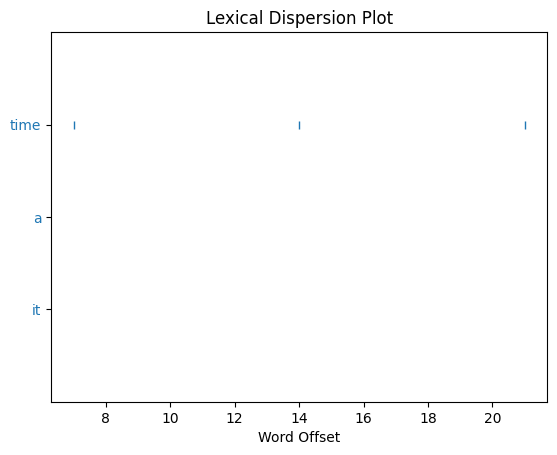

In [ ]:
# create a dispersion plot of given words
plot = text.dispersion_plot(['it', 'a', 'time'])


This code snippet demonstrates how to create a lexical dispersion plot for a set of specified words within a text using the *Natural Language Toolkit (NLTK)* in Python. Here’s a step-by-step explanation:

**Creating a Lexical Dispersion Plot:**

This step involves generating a plot that visually represents the distribution and frequency of occurrences of the specified words `('it', 'a', and 'time')` throughout the text. This visualization helps in understanding the usage dynamics of these words across the text.

**Assigning the Plot to a Variable:**

The assignment of the plot creation method to plot is included in the code snippet, but it does not hold or manipulate the `plot`, as the `dispersion_plot` method acts by side effect (displaying the plot) and does not return a plot object.

The dispersion plot is a powerful analytical tool for examining the behavior of words within a text, allowing researchers, students, and enthusiasts to uncover patterns and insights about word usage, thematic elements, and the structure of the textual content.

In [ ]:
# output the "most significant" bigrams, considering surrounding words (size of window) -- season to taste
text.collocations(num=20, window_size=4)


This code snippet is aimed at identifying and outputting the "most significant" bigrams within a given text using the *Natural Language Toolkit (NLTK)* in Python, with an adjustable consideration for the context size around each bigram, often referred to as the "window size". Here’s a detailed explanation:

**Identifying Significant Bigrams:**

Using the `collocations` method, this step involves discovering and listing the top 20 bigrams that are statistically significant based on their frequency of occurrence and their context within the text, considering a window size of 4 words around each word.

**Outputting the Significant Bigrams:**

The method automatically prints the list of significant bigrams to the console, providing a straightforward way to examine the most notable word pairs in the text.

By exploring significant bigrams with adjustable context size, this snippet facilitates a nuanced analysis of the text, enhancing understanding of its linguistic structure, thematic consistencies, or distinctive language patterns.

In [ ]:
 # given a set of words, what words are nearby
text.common_contexts(['wisdom'])

of_;


This code snippet demonstrates how to find and display common contexts for a specified set of words, in this case, a single word "wisdom", within a given text using the *Natural Language Toolkit (NLTK)* in Python. Here's a step-by-step explanation:

**Finding Common Contexts for a Set of Words:**

By invoking the `common_contexts` method with a list containing the word `'wisdom'`, this step focuses on identifying the immediate linguistic environment where `'wisdom'` occurs within the text. This method assesses the usage patterns of `'wisdom'`by examining the words that commonly flank it.

**Displaying Common Contexts:**

The common contexts discovered by the method are automatically output to the console, showing where and how the word `'wisdom'` is typically used within the text's linguistic structure.

This approach is particularly useful for linguistic and literary analysis, offering a lens through which to examine the connotations and thematic connections of specific words within a text. It enhances the understanding of a word's role and its interaction with other words, contributing to a deeper appreciation of the text's complexity and nuance.

In [ ]:
# list the words (features) most associated with the given word
text.similar('wisdom')

This code snippet is designed to find and list words that are most similar to the specified word "wisdom" within a given text, utilizing the *Natural Language Toolkit (NLTK)* in Python. Here’s a detailed explanation:

**Listing Words Most Similar to a Given Word:**

By utilizing the `similar` method, this step involves identifying and listing words that share similar contexts with the word "wisdom" in the text. This is based on the analysis of where and how these words are used in relation to the surrounding words.

**Outputting Similar Words:**

The method automatically prints the similar words to the console, providing insights into the semantic network and usage patterns associated with "wisdom" within the text.

This functionality is particularly useful for linguistic analysis, offering insights into the lexical and semantic landscape of a text. It helps in understanding how words are related to each other within the text, uncovering synonyms, thematic connections, and the broader linguistic environment of a specified word.

In [ ]:
# create a list of sentences, and display one -- season to taste
from nltk import sent_tokenize
sentences = sent_tokenize(recognized_text)
index = int(input("Enter the number of the sentence you wish to access: "))
if index - 1 < len(sentences):
    sentence = sentences[index - 1]
    print(sentence)
else:
    if len(sentences) == 1:
        print(f"That number is out of range. The text only has {len(sentences)} sentence.")
    else:
        print(f"That number is out of range. The text only has {len(sentences)} sentences.")

Enter the number of the sentence you wish to access: 1
It was the best of times, it was the worst of times, it was the age of wisdom; it was the age of foolishness .


This code snippet demonstrates how to tokenize a block of text into sentences, then allows a user to select and display a specific sentence by entering its number. Here's a step-by-step explanation:

**Tokenizing Text into Sentences:**

The block of text is split into individual sentences using the `sent_tokenize` function, resulting in a list where each item is a separate sentence.

**Accessing and Displaying a Specific Sentence:**

The user is prompted to select a sentence by number. The code then validates this input and either displays the chosen sentence or informs the user if the requested number is out of the specified range.

This approach enables detailed examination of the text at the sentence level, facilitating analyses or operations that require access to individual sentences within a larger body of text.

In [ ]:
# tokenize the sentence and parse it into parts-of-speech, all in one go
from nltk import pos_tag
sentence = pos_tag(word_tokenize(sentence))
print(sentence)

[('It', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('best', 'JJS'), ('of', 'IN'), ('times', 'NNS'), (',', ','), ('it', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('worst', 'JJS'), ('of', 'IN'), ('times', 'NNS'), (',', ','), ('it', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('age', 'NN'), ('of', 'IN'), ('wisdom', 'NN'), (';', ':'), ('it', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('age', 'NN'), ('of', 'IN'), ('foolishness', 'NN'), ('.', '.')]


This code snippet demonstrates how to tokenize a given sentence into individual words and then annotate each token with its corresponding *part-of-speech (POS)* tag, all in one go using the *Natural Language Toolkit (NLTK)* in Python. Here's a detailed explanation:

**Tokenizing and POS Tagging:**

The sentence is first tokenized into individual words. These tokens are then annotated with part-of-speech tags, which classify each word according to its grammatical category (such as noun, verb, adjective, etc.), based on both its definition and its context within the sentence.

**Displaying Tokenized and Tagged Sentence:**

The resulting list of tuples, each containing a word and its POS tag, is printed to the console. This output offers a clear view of the grammatical composition of the sentence, which can be useful for linguistic analysis, natural language processing tasks, or simply for educational purposes.

This snippet effectively combines the processes of word tokenization and part-of-speech tagging into a single streamlined operation, showcasing the powerful linguistic analysis capabilities provided by NLTK.

In [ ]:
 # extract named enities from a sentence, and print the results
from nltk import ne_chunk
entities = ne_chunk(sentence)
print(entities)

(S
  It/PRP
  was/VBD
  the/DT
  best/JJS
  of/IN
  times/NNS
  ,/,
  it/PRP
  was/VBD
  the/DT
  worst/JJS
  of/IN
  times/NNS
  ,/,
  it/PRP
  was/VBD
  the/DT
  age/NN
  of/IN
  wisdom/NN
  ;/:
  it/PRP
  was/VBD
  the/DT
  age/NN
  of/IN
  foolishness/NN
  ./.)


This code snippet is focused on extracting named entities from a sentence and printing the results using the *Natural Language Toolkit (NLTK)* in Python. Here's a detailed explanation:

**Extracting Named Entities:**

This step involves applying the `ne_chunk` function to a part-of-speech tagged sentence. The function identifies and classifies named entities within the sentence based on their context and the part-of-speech tags of their constituent words.

**Printing the Named Entities:**

The resulting tree structure, which represents the named entities extracted from the sentence, is printed to the console. This output provides a clear view of the named entities identified in the sentence, along with their classification into various types.

This snippet showcases how NLTK can be used for named entity recognition, a crucial task in many natural language processing and information extraction applications. The ability to identify and categorize named entities in text is valuable for understanding the content and context of documents, enhancing search and analysis capabilities.

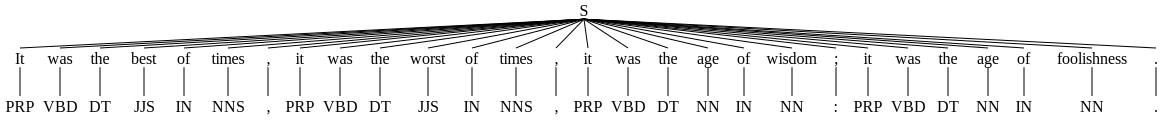

In [ ]:
# output the entites graphically
entities

The code snippet you've shared implies the intention to output named entities in a graphical format, specifically referring to the `entities` variable which is expected to hold the result of *named entity recognition (NER) *performed by the ne_chunk function from the *Natural Language Toolkit (NLTK)*.